# Exploratory Data Analysis
Exploring autoria dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

## Key notes

<font size="4">

Here are some key notes made based on 'autoria dataset' preliminary exploration represented below.

- In the dataset `some brands are represented only with a few cars`, <br>
    so if model will have poor performance, it might be resonable <br>
    to remove brands that have less than 5 or 10 <br>
    (additional research needed to specify optimal number) <br>
    number of cars. Though it might not be relevant if we only predict price by image.
<br><br>
- `Majority of prices are under 40 000$`, so model may perform poorly on expensive cars.
<br><br>
- As expected, `mileage, engine size, fuel type and transmission type` seem to `influence price`.
    
</font>

## Setup

In [2]:
data_dir = Path(os.getcwd()).parent/'datasets/autoria/'

In [3]:
df = pd.read_csv(data_dir/'autoria_clean_data.csv')
df['pub_date'] = pd.to_datetime(df['pub_date'])

In [4]:
LABEL_SIZE = 16
TICKS_SIZE = 14
# Number of items to take for 'top' plots
TOP = 10

TITLE_FONT = {
    'family': 'serif',
    'color':  'darkblue',
    'weight': 'normal',
    'size': 20,
}

LABEL_FONT = {
    'size': LABEL_SIZE
}

def customize_axes(
    ax, title=None, 
    xlabel=None,
    ylabel=None,
    xticks=None,
    yticks=None,
    xticklabels=None,
    title_font=False,
    labelsize=14,
):
    
    title_font = {
        'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 20,
    } if not title_font else title_font
    
    ax.tick_params(labelsize=labelsize)
    if title is not None: 
        ax.set_title(title, fontdict=title_font)
        
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontdict=LABEL_FONT)
        
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontdict=LABEL_FONT)
        
    if xticks is not None:
        ax.set_xticks(xticks)
        
    if yticks is not None:
        ax.set_yticks(yticks)
        
    if xticklabels is not None:
        ax.set_xticklabels(xticklabels)
    

## Quick data examination

In [5]:
df.head()

,id,brand,price_USD,mileage_kkm,fuel_type,transmission_type,pub_date,year_made,model,engine_size
0,0,Mercedes-Benz,8999,159,gas/petrol,automatic,2021-05-21,2007,E 280 4MATIC AT CLASSIC,3.0
1,1,Mercedes-Benz,79900,103,diesel,automatic,2021-05-15,2015,G 350 Designo,3.0
2,2,BMW,15999,145,petrol,automatic,2021-04-18,2010,550,4.4
3,3,MINI,10200,111,petrol,automatic,2021-05-21,2014,Countryman S,1.6
4,4,Nissan,13900,97,petrol,automatic,2021-05-19,2010,X-Trail,2.0


In [6]:
df.describe()

,id,price_USD,mileage_kkm,year_made,engine_size
count,146814.000000,146814.000000,146814.000000,146814.000000,136162.000000
mean,73406.500000,11559.182421,181.878493,2008.295994,2.018547
std,42381.695548,16175.555228,102.133535,7.541967,0.712282
min,0.000000,250.000000,0.000000,1900.000000,0.000000
25%,36703.250000,5100.000000,113.000000,2005.000000,1.600000
50%,73406.500000,8000.000000,180.000000,2009.000000,1.900000
75%,110109.750000,13000.000000,236.000000,2013.000000,2.200000
max,146813.000000,529900.000000,999.000000,2021.000000,7.400000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146814 entries, 0 to 146813
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 146814 non-null  int64         
 1   brand              146814 non-null  object        
 2   price_USD          146814 non-null  int64         
 3   mileage_kkm        146814 non-null  int64         
 4   fuel_type          144972 non-null  object        
 5   transmission_type  137884 non-null  object        
 6   pub_date           146812 non-null  datetime64[ns]
 7   year_made          146814 non-null  int64         
 8   model              146814 non-null  object        
 9   engine_size        136162 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 11.2+ MB


## Top popular car brands

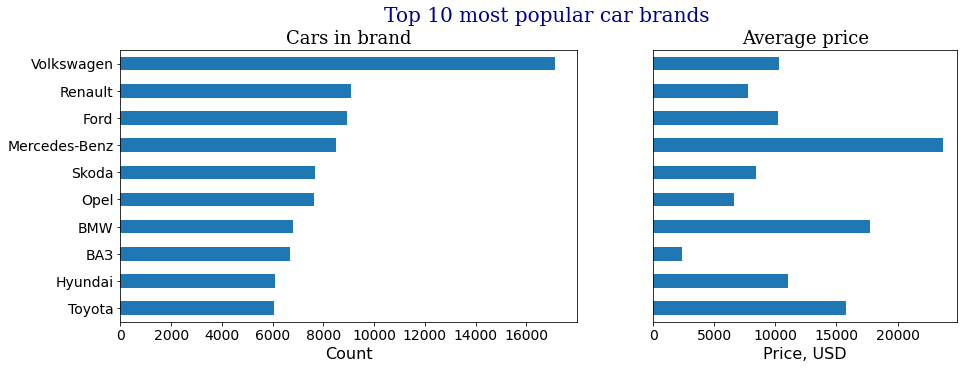

In [8]:
subtitle_font = {
    'family': 'serif',
    'color':  'black',
    'size': 18,
}
subtitle_price = 'Average price'
subtitle_count = 'Cars in brand'

most_popular = df.groupby('brand')['price_USD']\
                .agg(['mean', 'count'])\
                .sort_values('count').tail(TOP)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),
                               gridspec_kw={'width_ratios': [3, 2]})

most_popular['count'].plot.barh(ax=ax1)
most_popular['mean'].plot.barh(ax=ax2)

customize_axes(ax1, title=subtitle_count, 
               xlabel='Count', ylabel='', 
               title_font=subtitle_font)

customize_axes(ax2, title=subtitle_price, 
               xlabel='Price, USD', ylabel='', yticks=[],
               title_font=subtitle_font)

fig.suptitle(f'Top {TOP} most popular car brands', x=0.52, y=1.0,
             fontdict=TITLE_FONT, size=20)
plt.show()

## Top expensive car brands

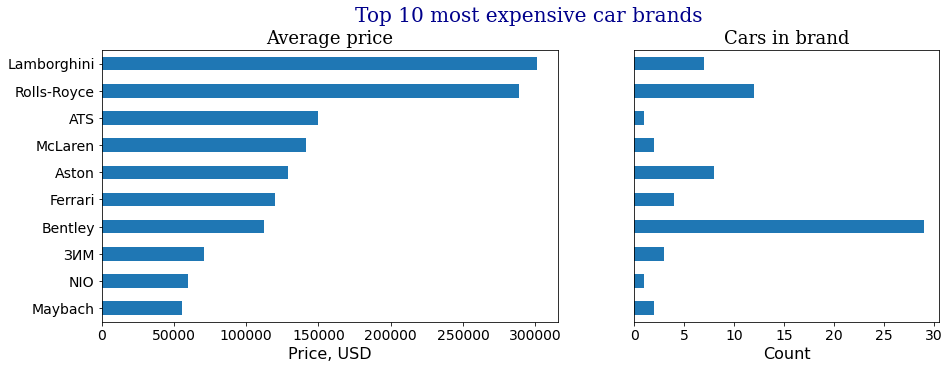

In [9]:
most_expensive = df.groupby('brand')['price_USD']\
                    .agg(['mean', 'count'])\
                    .sort_values('mean').tail(TOP)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), 
                               gridspec_kw={'width_ratios': [3, 2]})
most_expensive['mean'].plot.barh(ax=ax1)
most_expensive['count'].plot.barh(ax=ax2)

customize_axes(ax1, title=subtitle_price,
               xlabel='Price, USD', ylabel='', 
               title_font=subtitle_font)

customize_axes(ax2, title=subtitle_count,
               xlabel='Count', ylabel='', yticks=[], 
               title_font=subtitle_font)

fig.suptitle(f'Top {TOP} most expensive car brands', x=0.52, y=1.0,
             fontdict=TITLE_FONT, size=20)
plt.show()

## Top cheap car brands

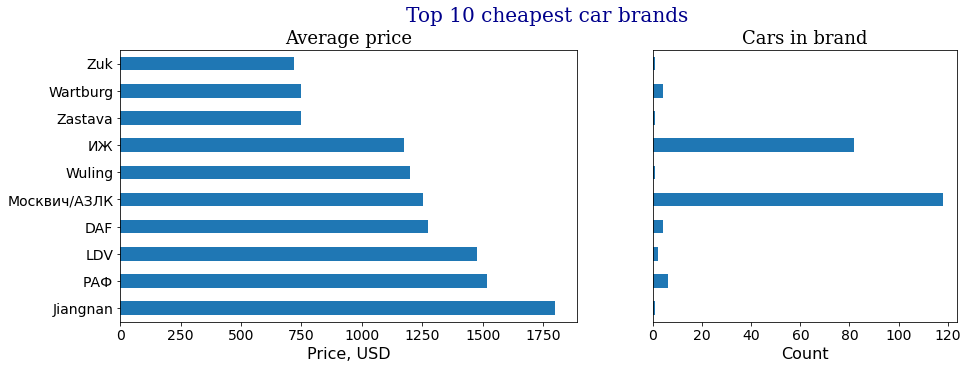

In [10]:
cheapest = df.groupby('brand')['price_USD']\
            .agg(['mean', 'count'])\
            .sort_values('mean', ascending=False).tail(TOP)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), 
                               gridspec_kw={'width_ratios': [3, 2]})
cheapest['mean'].plot.barh(ax=ax1)
cheapest['count'].plot.barh(ax=ax2)

customize_axes(ax1, title=subtitle_price, 
               xlabel='Price, USD', ylabel='', 
               title_font=subtitle_font)

customize_axes(ax2, title=subtitle_count, 
               xlabel='Count', ylabel='', yticks=[], 
               title_font=subtitle_font)

fig.suptitle(f'Top {TOP} cheapest car brands', x=0.52, y=1.0,
             fontdict=TITLE_FONT, size=20)
plt.show()

## Price distribution

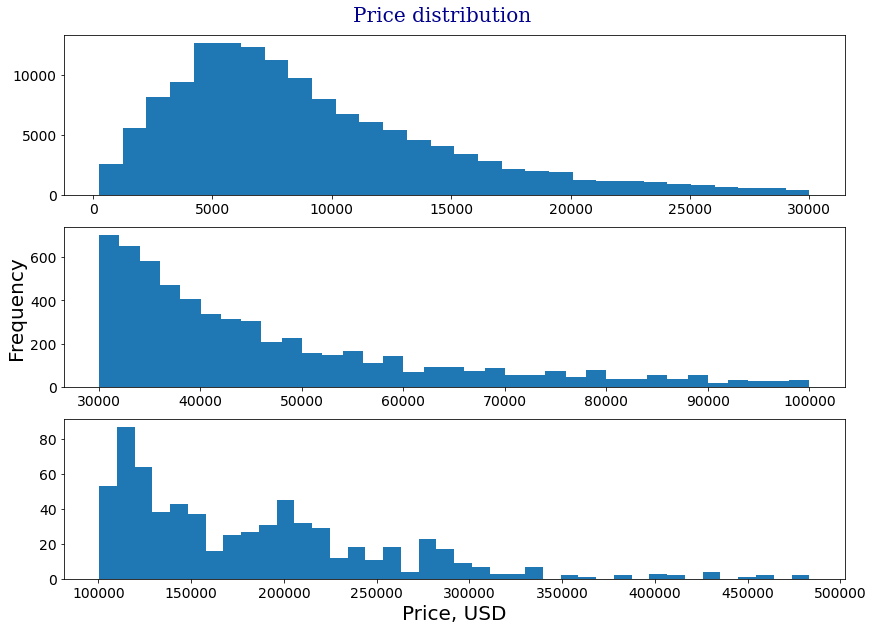

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(14, 10))

df.loc[df['price_USD'] < 30_000, 'price_USD'].plot.hist(bins=30, ax=axs[0])

df.loc[(df['price_USD'] > 30_000) & 
       (df['price_USD'] < 100_000), 'price_USD'].plot.hist(bins=35, ax=axs[1])


df.loc[(df['price_USD'] > 100_000) & 
       (df['price_USD'] < 500_000), 'price_USD'].plot.hist(bins=40, ax=axs[2])

fig.suptitle('Price distribution', y=0.92, size=20, fontdict=TITLE_FONT)
axs[2].set_xlabel('Price, USD', size=20)

axs[1].set_ylabel('Frequency', size=20)
axs[0].set_ylabel('')
axs[2].set_ylabel('')

for ax in axs:
    customize_axes(ax)

plt.show()

## Price over mileage

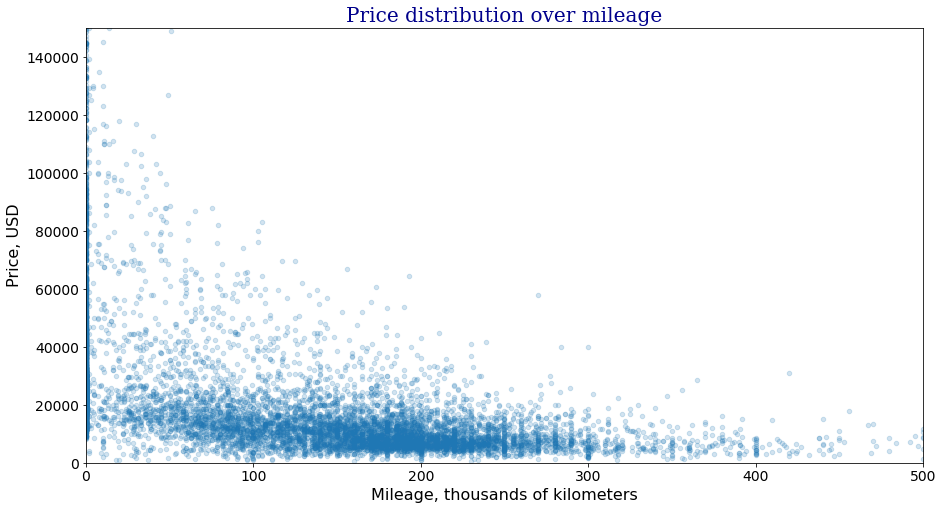

In [12]:
N_IMAGES = 10_000

fig, ax = plt.subplots(figsize=(15, 8))
df.iloc[:N_IMAGES].plot.scatter(x='mileage_kkm', y='price_USD', ax=ax, alpha=0.2)

ax.axis([0, 500, 0, 150_000])
customize_axes(ax, title='Price distribution over mileage', 
               xlabel='Mileage, thousands of kilometers',
               ylabel='Price, USD')
plt.show()

## Price over engine size

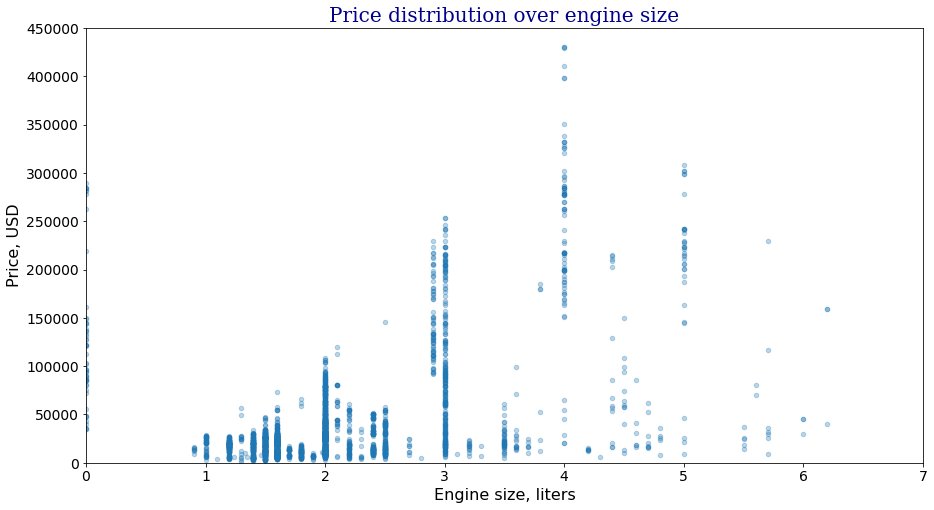

In [13]:
N_IMAGES = 4000

fig, ax = plt.subplots(figsize=(15, 8))
df.iloc[:N_IMAGES].plot.scatter(x='engine_size', y='price_USD', 
                                ax=ax, alpha=0.3)

ax.axis([0, 7, 0, 450_000])
customize_axes(ax, title='Price distribution over engine size', 
               xlabel='Engine size, liters', 
               ylabel='Price, USD')
plt.show()

## Transmission and fuel types

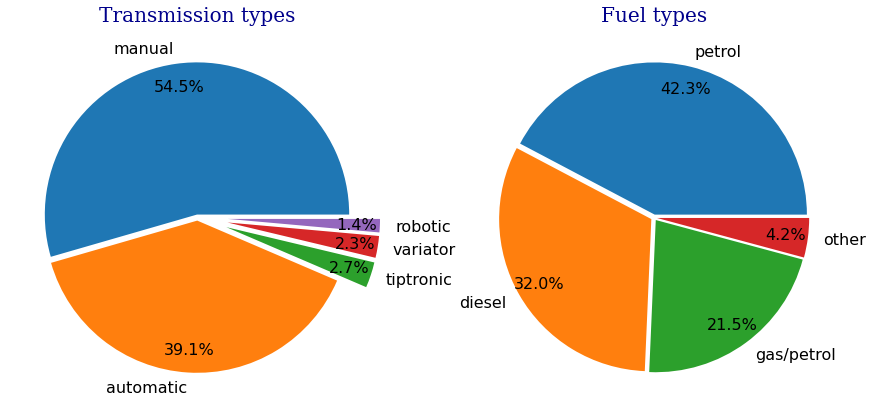

In [14]:
transmissions_count = df['transmission_type'].value_counts()

top_fuel = ['gas/petrol', 'diesel', 'petrol']
fuels_count = df['fuel_type'].where(df['fuel_type'].isin(top_fuel), 
                                    'other').value_counts()
common_properties = {
    'autopct': '%.1f%%',
    'pctdistance': 0.85,
    'fontsize': 16,
}


fig, (ax1, ax2) = plt.subplots(1, 2)

transmissions_count.plot.pie(
    ax=ax1,
    explode=[0.02, 0.02, 0.2, 0.2, 0.2],
    figsize=(15, 15),
    **common_properties
)
customize_axes(ax1, ylabel='', title='Transmission types')

fuels_count.plot.pie(
    ax=ax2,
    explode=[0.02 for _ in range(fuels_count.size)],
    **common_properties
)
customize_axes(ax2, ylabel='', title='Fuel types')

plt.show()

## Price distribution by transmission type

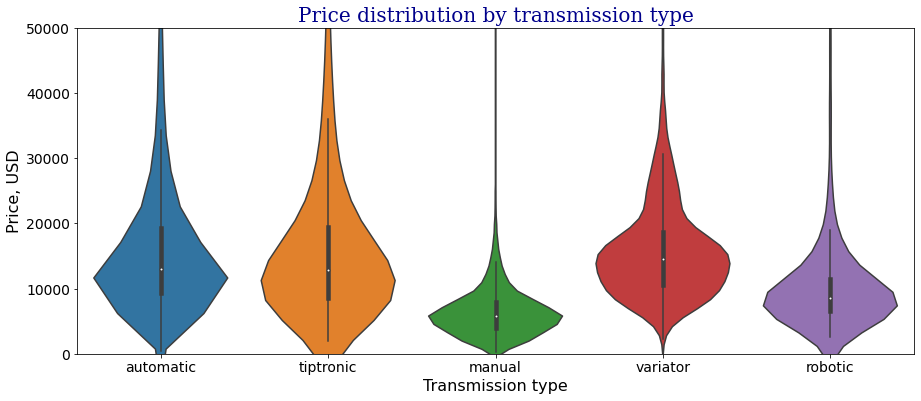

In [15]:
ttypes = df['transmission_type'].dropna().unique()
data=[
    df[df['transmission_type'] == ttype]['price_USD'].values
    for ttype in ttypes
]

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.violinplot(data=data, scale='width')

customize_axes(ax, title='Price distribution by transmission type', 
               xlabel='Transmission type', 
               ylabel='Price, USD', 
               xticklabels=ttypes)
ax.axis(ymin=0, ymax=50_000)
plt.show()

## Price distribution by fuel type

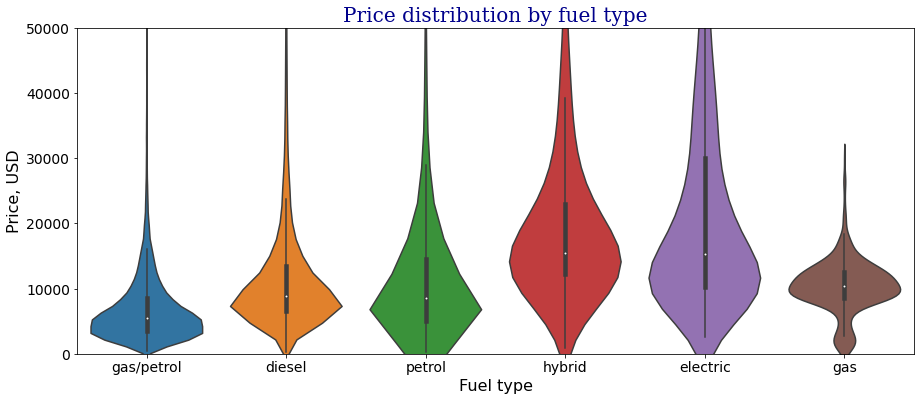

In [16]:
ftypes = df['fuel_type'].dropna().unique()
data=[
    df[df['fuel_type'] == ftype]['price_USD'].values
    for ftype in ftypes
]

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.violinplot(data=data, scale='width')

customize_axes(ax, title='Price distribution by fuel type', 
               xlabel='Fuel type', 
               ylabel='Price, USD', 
               xticklabels=ftypes)
ax.axis(ymin=0, ymax=50_000)
plt.show()